<a href="https://colab.research.google.com/github/donna6355/study_python/blob/master/ml_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

# # 코랩 konlpy 실행
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

# # Mecab 설치 후 Google Drive에 복사
# !cp -r /usr/local/lib/mecab /content/drive/MyDrive/mecab
# !cp -r /usr/local/etc/mecabrc /content/drive/MyDrive/mecab

# !pip install kiwipiepy
# import pandas as pd
# from kiwipiepy import Kiwi
# from kiwipiepy.utils import Stopwords
# from konlpy.tag import Okt
# from tqdm import tqdm

In [13]:
df = pd.read_csv('kor_crawling.csv',encoding='utf-8-sig')
df

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0
...,...,...,...,...,...
6275,2019년 12월 14일,김영진,5,좋네요,0
6276,2020년 1월 29일,이세화,5,좋아요,0
6277,2017년 8월 22일,Google 사용자,5,짱좋아요 ♡-♡♡^^,0
6278,2020년 1월 1일,김희진,5,좋아요~~~,0


In [14]:
# 1. lower case
df['Review'] = df['Review'].apply(lambda x : x.lower())
df

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0
...,...,...,...,...,...
6275,2019년 12월 14일,김영진,5,좋네요,0
6276,2020년 1월 29일,이세화,5,좋아요,0
6277,2017년 8월 22일,Google 사용자,5,짱좋아요 ♡-♡♡^^,0
6278,2020년 1월 1일,김희진,5,좋아요~~~,0


In [15]:
# 2. 특수기호, 숫자 제거
import re

remove = re.compile(r'[^a-z가-힣\s\.\!\?]')
df['Review'] = df['Review'].apply(lambda x : remove.sub(" ",x))
df['Review'] = df['Review'].apply(lambda x : x.replace("  "," "))
df


,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0
...,...,...,...,...,...
6275,2019년 12월 14일,김영진,5,좋네요,0
6276,2020년 1월 29일,이세화,5,좋아요,0
6277,2017년 8월 22일,Google 사용자,5,짱좋아요,0
6278,2020년 1월 1일,김희진,5,좋아요,0


In [16]:
# 3. 짧은 글 제거
df['len'] = df['Review'].apply(lambda x : len(x))
df = df.loc[df['len']>=12]
del df['len']
df = df.reset_index(drop=True)
df

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0
...,...,...,...,...,...
3856,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0
3857,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0
3858,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0
3859,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!! 이 앱 만드신 제작자님!힘네세요!!!,0


In [25]:
# 4. tokenizing
df["token"] = df["Review"].progress_apply(lambda x : extract_pos(x,['Noun', 'Verb','Adjective']))
df

100%|██████████| 3861/3861 [00:28<00:00, 135.34it/s]


,Date,Name,Score,Review,like,token
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 이다, 에어컨, 기능, 공..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 하다, 하다, 끄다, 전용, 건, 좋다, 격, 제어기..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 이다, 공기청정기, 자다, 연동, 시키다, 걸리다, ..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 되다, 하다, 연결하다, 놀라다, 정도, 세상, 쓰레기, 연결, 번거롭다..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 하다, 수, 있다, 건조,..."
...,...,...,...,...,...,...
3856,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, 되다, 안되다]"
3857,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,"[센서, 자다, 쓰다, 있다]"
3858,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, 나가다, 되다, 진짜, 좋다]"
3859,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!! 이 앱 만드신 제작자님!힘네세요!!!,0,"[제, 거, 다운, 받다, 돼다, 이, 앱, 만들다, 제작자, 힘, 세]"


In [24]:
#요구사항에 따라서 필요한 품사 말뭉치만 남기기도 한다.
okt = Okt()
tqdm.pandas() # progress_apply와 사용 가능!
text= '나는 오늘 맛있는 밥을 먹었다.'
def extract_pos(text, pos):
  left = []
  for t,c in okt.pos(text, stem = True, norm = True):
    if c in pos:
      left.append(t)
  return left

extract_pos(text, ['Noun'])

['나', '오늘', '밥']

In [18]:
# 5. 불용어 제거 remove stopwords
stopwords = Stopwords()
sw = set([i[0] for i in stopwords.stopwords])

cleaned_token = []
for i in df["token"]:
  cleaned_token.append([ w for w in i if w not in sw])
df["token"] = cleaned_token
df

,Date,Name,Score,Review,like,token
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 이다, ., 에어컨, 기능..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 하다, 하다, 끄다, 전용, 인, 건, 좋다, 격, ..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 이다, ., tv, 랑, 공기청정기, 자다, 연동, ..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 되다, 하다, 연결하다, 놀라다, 정도, 세상, 쓰레기, 에요, ., 연..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 으로도, 추가, 하다, 있다, 건..."
...,...,...,...,...,...,...
3856,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, ?, 잘, 되다, 안되다, ...]"
3857,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,"[센서, 너무, 자다, 쓰다, 있다]"
3858,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, !!, 밖에, 나가다, 되다, 진짜, 좋다, !]"
3859,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!! 이 앱 만드신 제작자님!힘네세요!!!,0,"[거, 다운, 받다, 돼다, !!!, 앱, 만들다, 제작자, 님, !, 힘, 네, ..."


앞으로 할일!

토큰을 임베딩하고 비지도학습으로 비슷한 주제에 관해 이야기하는 고객 군집을 생성 -> 그들이 공유하는 요구사항이 무엇인지 감성 분석, 맥락 도출 등

In [30]:
# !pip install gensim
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [35]:
#embedding Doc2Vec

tagged_corpus_list = []
for index, row in df.iterrows():
  text = row['token']
  tag = f'document {index}'
  tagged_corpus_list.append(TaggedDocument(tags = [tag], words = text))
# len(tagged_corpus_list)

d2v_model = Doc2Vec(vector_size=300, window = 5, dm=1)
d2v_model.build_vocab(tagged_corpus_list)
d2v_model.train(tagged_corpus_list, total_examples=d2v_model.corpus_count, epochs = 30)

In [40]:
df['vector'] = [d2v_model.dv.get_vector(f'document {i}') for i in df.index]
df

,Date,Name,Score,Review,like,token,vector
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 이다, 에어컨, 기능, 공...","[0.01273904, 0.17771636, -0.1115613, 0.2371044..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 하다, 하다, 끄다, 전용, 건, 좋다, 격, 제어기...","[0.09402349, 0.14413226, -0.053900637, 0.07002..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 이다, 공기청정기, 자다, 연동, 시키다, 걸리다, ...","[0.06872313, 0.007526517, -0.017750883, -0.132..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 되다, 하다, 연결하다, 놀라다, 정도, 세상, 쓰레기, 연결, 번거롭다...","[0.027484355, 0.095199235, -0.05662026, 0.0531..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 하다, 수, 있다, 건조,...","[0.036312144, 0.13920677, 0.019147186, 0.14777..."
...,...,...,...,...,...,...,...
3856,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, 되다, 안되다]","[0.0048014806, 0.040984035, 0.003550363, 0.002..."
3857,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,"[센서, 자다, 쓰다, 있다]","[0.0018552481, 0.024394214, 0.0070024743, 0.01..."
3858,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, 나가다, 되다, 진짜, 좋다]","[0.013219717, 0.035320047, -0.0027178267, 0.00..."
3859,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!! 이 앱 만드신 제작자님!힘네세요!!!,0,"[제, 거, 다운, 받다, 돼다, 이, 앱, 만들다, 제작자, 힘, 세]","[0.017281933, 0.056810904, -0.013606101, -0.00..."


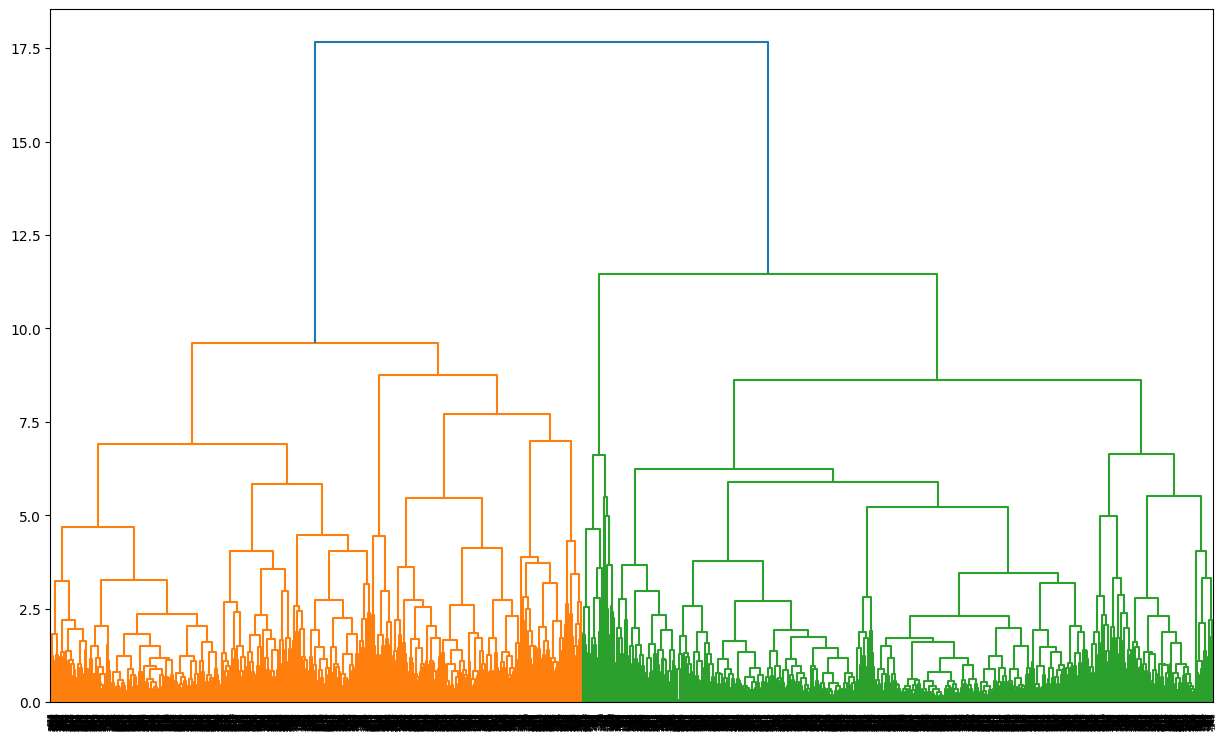

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#dendrogram 시각화로 적절한 클러스터 사이즈를 예측해본다
#method="ward" -> 거리가 아닌 밀도기반
linked = linkage(list(df['vector']), method="ward")
plt.figure(figsize=(15,9))
dendrogram(linked)
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
prediction = agg.fit_predict(list(df['vector']))
score = silhouette_score(list(df['vector']),prediction)
score


np.float32(0.10559901)

 11%|█         | 1/9 [00:06<00:53,  6.70s/it]

score :  0.10559901


 22%|██▏       | 2/9 [00:09<00:30,  4.31s/it]

score :  0.10281108


 33%|███▎      | 3/9 [00:11<00:20,  3.40s/it]

score :  0.07155466


 44%|████▍     | 4/9 [00:13<00:14,  2.90s/it]

score :  0.07707468


 56%|█████▌    | 5/9 [00:17<00:12,  3.25s/it]

score :  0.059504855


 67%|██████▋   | 6/9 [00:20<00:09,  3.00s/it]

score :  0.062825896


 78%|███████▊  | 7/9 [00:22<00:05,  2.76s/it]

score :  0.06620961


 89%|████████▉ | 8/9 [00:24<00:02,  2.60s/it]

score :  0.024133174


100%|██████████| 9/9 [00:26<00:00,  2.99s/it]

score :  0.030153606


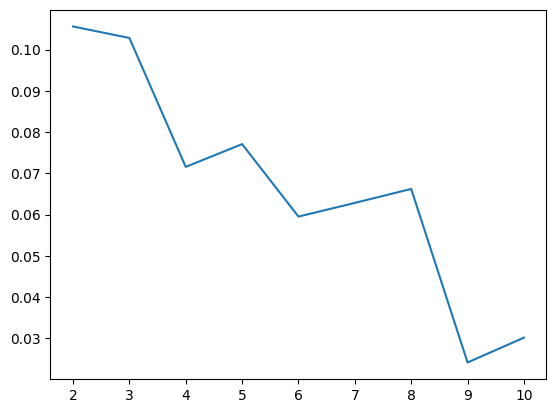

In [52]:
# try 2-10 clusters and visualize score
scores = []
for i in tqdm(range(2,11)):
  agg = AgglomerativeClustering(n_clusters = i, linkage = 'ward')
  prediction = agg.fit_predict(list(df['vector']))
  score = silhouette_score(list(df['vector']),prediction)
  scores.append(score)

plt.plot(range(2,11),scores)

# elbow point 튀어오르는 포인트
# 실루엣 점수가 제일 높은 경우를 따라서 갈 수도 있지만 수학적 기반이고 임의로 엘보우 포인트를 정하기도 한다

In [56]:
#clustering
agg = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
df['cluster'] = agg.fit_predict(list(df['vector']))
df

,Date,Name,Score,Review,like,token,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 있...,2,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 이다, 에어컨, 기능, 공...","[0.01273904, 0.17771636, -0.1115613, 0.2371044...",2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 하다, 하다, 끄다, 전용, 건, 좋다, 격, 제어기...","[0.09402349, 0.14413226, -0.053900637, 0.07002...",2
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 이다, 공기청정기, 자다, 연동, 시키다, 걸리다, ...","[0.06872313, 0.007526517, -0.017750883, -0.132...",0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 되다, 하다, 연결하다, 놀라다, 정도, 세상, 쓰레기, 연결, 번거롭다...","[0.027484355, 0.095199235, -0.05662026, 0.0531...",2
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 하다, 수, 있다, 건조,...","[0.036312144, 0.13920677, 0.019147186, 0.14777...",2
...,...,...,...,...,...,...,...,...
3856,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, 되다, 안되다]","[0.0048014806, 0.040984035, 0.003550363, 0.002...",0
3857,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,"[센서, 자다, 쓰다, 있다]","[0.0018552481, 0.024394214, 0.0070024743, 0.01...",0
3858,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, 나가다, 되다, 진짜, 좋다]","[0.013219717, 0.035320047, -0.0027178267, 0.00...",0
3859,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!! 이 앱 만드신 제작자님!힘네세요!!!,0,"[제, 거, 다운, 받다, 돼다, 이, 앱, 만들다, 제작자, 힘, 세]","[0.017281933, 0.056810904, -0.013606101, -0.00...",1


In [58]:
#너무 적은 클러스터가 없는지 확인햏보기
df['cluster'].value_counts()

,count
cluster,
0,1987
3,1068
1,632
2,107
4,67


In [59]:
#중간 저장
import pickle
with open('한글 크롤링 클러스터까지.pkl','wb') as file:
    pickle.dump(df,file)

In [70]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


In [75]:
all_document = []
for i in df['cluster'].unique():
  temp = df.loc[df['cluster'] == i]['token']
  cluster_document = ''
  for w in temp:
    doc = " ".join(w)+' '
    cluster_document+=doc
  all_document.append(cluster_document)
all_document[0]

'시스템 에어컨 대다 연결하다 격 제어 사용 이다 에어컨 기능 공기청정기 능 있다 앱 모드 청정 모드 없다 냉방 습 송풍 난방 자동 만 있다 청정 없다 리모컨 청정 누르다 앱 송풍 데 앱 송풍 선택 하다 청정 되다 않다 하다 리모컨 송풍 청정 킬수 있다 원격 송풍 공기 청정 에어컨 공기 청정 난방 청정 사용 하다 하다 어떻다 하다 인덕션 제어 용 사용 하다 하다 끄다 전용 건 좋다 격 제어기 능이 계속 꺼지다 야하다 이유 궁금하다 전원 켜다 격 제어 누르다 전원 꺼지다 전 격 제어 유지 되다 좋다 혹시 켜다 경우 밖 제어 하다 격 제어 가능 꺼지다 끌 수 없다 위함 하다 것 같다 세탁기 되다 하다 연결하다 놀라다 정도 세상 쓰레기 연결 번거롭다 사용성 까다롭다 단독 기능 아예 불가능하다 세탁기 가다 전원 켜다 원격 누르다 야하다 크다 어른 애기 타다 보행기 억지로 타고 헤헤 거 보다 나 차 사다 하다 거 같다 건조 완료 후 에어 리플 레쉬 원격 추가 하다 수 있다 건조 완료 후 격 제어 하다 말다 격 제어 시 건조 완료 되다 건조 부족하다 경우 종종 있다 에어 리플 레쉬 추다 하다 격 제어 사용 시 건조 완료 후 격 제어 되어다 풀 편하다 상태 유지 되다 프로그램 개선 하다 줄다 샤오미 비교 해보다 기능 한참 부족하다 공기청정기 예약 기능 단순 켜다 끄다 없다 모드 선택 안되다 나마 켜다 꺼지다 때 알람 오지 않다 가다 기술 없다 아니다 부족하다 수준 앱 제공 하다 수 없다 의문 이다 기기 가격 차 생각 하다 더 더욱 그렇다 빠르다 발전 하다 모습 기대 해보다 공기청정기 컨트롤 기능 있다 다른 제품 상태 보이 컨트롤 안 되다 기능 추가 해주다 추가 공기 청정기 김치 냉장고 식기 세척 기 세탁기 건조기 사용 중 이다 김치 냉장고 온도 조절 안전 무관 하다 쉬다 추가 가능하다 듯 하다 식기 세척 기 건조기 등 사용자 동의 여부 따르다 컨트롤 기능 사용 하다 수 있다 하다 안 되다 집 안 같다 와이파이 연결 되다 경우 컨트롤 되다 위험성 없다 보이다 편리하다 자다 

In [81]:
#tf-idf vectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(all_document)

#transform to dataFrame
feature_names = vectorizer.get_feature_names_out() #vocab
tfidf = tfidf.toarray()


tfidf = pd.DataFrame(tfidf, columns = feature_names)
tfidf = tfidf.transpose() #swap row - col
tfidf

,0,1,2,3,4
가게,0.000000,0.000821,0.000000,0.002195,0.000000
가격,0.002643,0.001721,0.001834,0.001533,0.000000
가구,0.000000,0.000000,0.000000,0.001361,0.000000
가기,0.000000,0.002464,0.000000,0.001098,0.000000
가까워지다,0.000000,0.001018,0.000000,0.000000,0.000000
...,...,...,...,...,...
히키,0.000000,0.000000,0.001627,0.000000,0.000000
힘내다,0.000000,0.001018,0.000000,0.000000,0.000000
힘드다,0.000000,0.002045,0.003270,0.002734,0.000000
힘들다,0.002235,0.001455,0.005428,0.001945,0.004617


In [90]:
#클러스터의 수가 작아서 유의미한 tf-idf 결과를 갖기 힘들다. 빈도분석과 비슷해짐..
#-> 키워드들로 가설을 세우고 원문을 확인할 필요가 있다
num = 0
tfidf.sort_values(by = num, ascending=False)[num].head(15)

,0
하다,0.668357
있다,0.319649
켜다,0.203500
되다,0.194472
전원,0.192928
기능,0.165413
세탁기,0.143060
좋다,0.143060
사용,0.125177
원격,0.124214


In [111]:
#현재 클러스터 출현 빈도 / 전체 문서 빈도
cnt = []
total = ''
for i in all_document:
  cnt.append(dict(Counter(i.split())))
  total += i
total = dict(Counter(total.split()))


ratio = []
for i in cnt:
  dic = {}
  for w in i:
    dic[w] = i[w]/total[w]
  ratio.append(dic)

result = pd.DataFrame()
num = 0
for a, i in zip(cnt, ratio):
  temp = pd.DataFrame({'token':list(a.keys()),'count':list(a.values()),'ratio':list(i.values())})
  temp = temp.sort_values(by="count", ascending=False).iloc[:100].sort_values(by="ratio", ascending=False).reset_index(drop = True)
  temp.columns = [f'token {num}',f'count {num}',f'ratio {num}']
  result = pd.concat([result,temp], axis = 1)
  num +=1

In [113]:
result.head(30)

,token 0,count 0,ratio 0,token 1,count 1,ratio 1,token 2,count 2,ratio 2,token 3,count 3,ratio 3,token 4,count 4,ratio 4
0,송풍,13,0.866667,편리하다,237,0.918605,공유기,57,0.721519,로그인,99,0.733333,피드백,6,0.666667
1,청정,10,0.833333,편하다,244,0.865248,계정,41,0.611940,서버,155,0.670996,내용,6,0.300000
2,헹굼,12,0.800000,유용하다,83,0.855670,벽,32,0.592593,점검,38,0.622951,답변,19,0.267606
3,운전,11,0.407407,알림,195,0.833333,걸이,32,0.592593,에러,32,0.615385,보내다,13,0.265306
4,오프,12,0.375000,조금,44,0.814815,시도,35,0.583333,동의,36,0.590164,메일,11,0.229167
5,직접,16,0.363636,좋다,845,0.814066,재,79,0.580882,응답,53,0.588889,없어지다,7,0.212121
6,원격,47,0.358779,끝나다,53,0.803030,해제,78,0.553191,가입,31,0.574074,서비스,11,0.196429
7,격,53,0.337580,아주,60,0.800000,와이파이,201,0.514066,부탁드리다,42,0.560000,리뷰,11,0.196429
8,전원,73,0.330317,알람,68,0.731183,해보다,69,0.496403,실패,36,0.553846,주다,12,0.187500
9,점,13,0.317073,진단,58,0.725000,네트워크,48,0.484848,계속,134,0.531746,비싸다,6,0.181818
